<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_DFT_FormationEnergiesAccuracyCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 798kB 2.8MB/s 
     |████████████████████████████████| 296kB 14.8MB/s 


In [2]:
import jarvis
jarvis.__version__

'2020.6.26'

In [3]:
!wget https://ndownloader.figshare.com/files/23508293 -O ssub.csv 

--2020-06-28 13:00:09--  https://ndownloader.figshare.com/files/23508293
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.255.47.165, 54.72.178.160, 52.17.76.230, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.255.47.165|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/23508293/ssub.csv [following]
--2020-06-28 13:00:09--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/23508293/ssub.csv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.100.179
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.100.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40900 (40K) [text/csv]
Saving to: ‘ssub.csv’

ssub.csv            100%[===================>]  39.94K  --.-KB/s    in 0.1s    

2020-06-28 13:00:10 (414 KB/s) - ‘ssub.csv’ saved [40900/40900]



In [4]:
from jarvis.core.composition import Composition
from jarvis.core.atoms import Atoms
import pandas as pd
from collections import OrderedDict
from jarvis.db.figshare import data
df=pd.read_csv('ssub.csv')
db3d=data('dft_3d')
js3d=pd.DataFrame(db3d)

In [5]:
def get_form(formula=''):
    formula=Composition.from_string(formula,sort=True).reduced_formula
    data=[]
    for i,ii in js3d.iterrows():
        #print (ii)
        atoms=Atoms.from_dict(ii['atoms'])
        iformula=Composition(atoms.composition.to_dict(),sort=True).reduced_formula
        ehull=ii['ehull']
        form_enp=ii['formation_energy_peratom']
        if formula==iformula:
            data.append([ii['jid'],formula,ehull, form_enp])
    return data
        

In [6]:
mem=[]
for i,ii in df.iterrows():
    comp=ii['Comp']
    FormEn=ii['FormEn']
    data=get_form(comp)
    info={}
    info['comp']=comp
    info['FormEn']=FormEn
    info['jdata']=data
    mem.append(info)
    
    

In [7]:
X=[]
Y=[]
for i in mem:
    if len(i['jdata'])>0:
        tmp=(sorted(i['jdata'],key=lambda x:x[3])[0])
        if tmp!='na' and tmp[2]==0.0 :
            X.append(float(i['FormEn']))
            Y.append(float(tmp[3]))
        

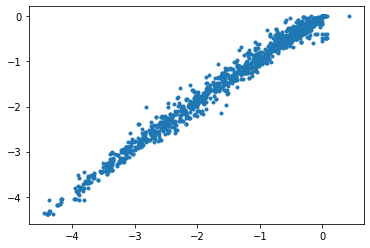

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,Y,'.')